Largest Rectangle in Histogram
===

***
Problem
---

Given n non-negative integers representing the histogram's bar height where the width of each bar is 1, find the area of
the largest rectangle in the histogram.

For example, given heights = [2, 1, 5, 6, 2, 3],
return 10

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from time import perf_counter

mpl.style.use('seaborn-whitegrid')

***
**Brute force solution - \$O(n^3)\$**

In [6]:
def largest_rectangle(histogram):
    N = len(histogram)
    area = 0
    for i in range(N):
        for j in range(i + 1, N + 1):
            h = min(histogram[i:j])
            area = max(area, h * (j - i))
    return area

In [9]:
assert(largest_rectangle([2, 1, 5, 6, 2, 3]) == 10)
assert(largest_rectangle([2, 2]) == 4)
assert(largest_rectangle([2]) == 2)
assert(largest_rectangle([2, 2, 3, 4]) == 8)
assert(largest_rectangle([4, 2, 3]) == 6)

***
**Divide and Conquer solution - \$O(n lgn)\$**

In [47]:
def largest_rectangle_dq(histogram):
    N = len(histogram)
    if N == 0:
        return 0
    elif N == 1:
        return histogram[0]
    else:
        m = N // 2
        # Find the largest rectangle contained entirely in left half
        left = largest_rectangle_dq(histogram[:m])
        # Find the largest rectangle contained entirely in right half
        right = largest_rectangle_dq(histogram[m:])
        # Find the largest rectangle overlapping the middle split
        overlap = 0
        i, j = m, m
        h = histogram[m]
        
        # `i` and `j` are inclusive indices 
        while i >= 0 and j < N:
            h = min(h, histogram[j], histogram[i])
            overlap = max(overlap, h * (j - i + 1))
            if i > 0 and j < N - 1:
                if histogram[i - 1] < histogram[j + 1]:
                    j += 1
                else:
                    i -= 1
            elif i > 0:
                i -= 1
            elif j < N:
                j += 1
            else:
                print('what')
                break
        return max(overlap, right, left)


In [112]:
assert(largest_rectangle_dq([2, 1, 5, 6, 2, 3]) == 10)
assert(largest_rectangle_dq([ 7, 17,  2, 14,  7,  5, 15, 13,  1, 17]) == 26)

arr = np.random.randint(1, 20, (100, 10))
for hist in arr:
    assert(largest_rectangle(hist) == largest_rectangle_dq(hist))

***
**Linear Time Solution - \$O(n)\$**

In [157]:
def largest_rectangle_lin(histogram):
    leftpoints, heights = [0], [0]
    area = 0

    for x, y in enumerate(histogram):
        if y > heights[-1]:
            leftpoints.append(x)
            heights.append(y)
        else:
            while heights and y < heights[-1]:
                h = heights.pop()
                left = leftpoints.pop()
                area = max(area, h * (x - left))
            if heights[-1] < y:
                heights.append(y)
                leftpoints.append(left)

    N = len(histogram)
    while heights:
        h = heights.pop()
        left = leftpoints.pop()
        area = max(area, h * (N - left))

    return area

In [158]:
assert(largest_rectangle_lin([2, 1, 5, 6, 2, 3]) == 10)
assert(largest_rectangle_lin([ 7, 17,  2, 14,  7,  5, 15, 13,  1, 17]) == 26)

arr = np.random.randint(1, 20, (100, 10))
for hist in arr:
    assert(largest_rectangle(hist) == largest_rectangle_lin(hist))

***
Benchmarks
---

In [60]:
%timeit largest_rectangle(np.random.randint(0, 100, 100))

24.4 ms ± 345 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [61]:
%timeit largest_rectangle_dq(np.random.randint(0, 100, 100))

1.04 ms ± 11.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [87]:
def benchmark(func, *args):
    start = perf_counter()
    ans = func(*args)
    end = perf_counter()
    return end - start

sizes = np.arange(100, 1000, 100)
bf = [benchmark(largest_rectangle, np.random.randint(1, 20, s)) for s in sizes]
dq = [benchmark(largest_rectangle_dq, np.random.randint(1, 20, s)) for s in sizes]

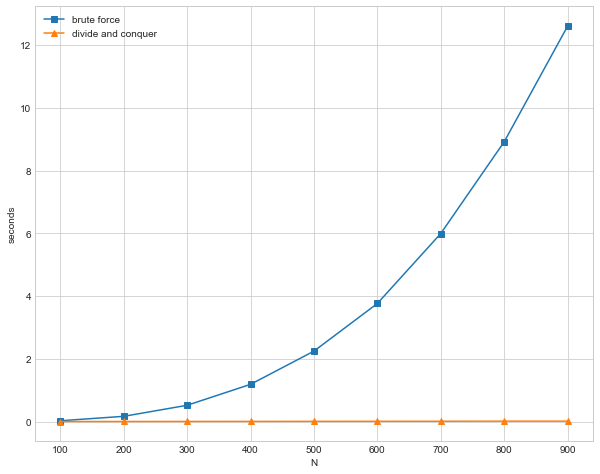

In [91]:
plt.plot(sizes, bf, marker='s', label='brute force')
plt.plot(sizes, dq, marker='^', label='divide and conquer')
plt.legend()
plt.setp(plt.gca(), ylabel='seconds', xlabel='N')
plt.gcf().set_size_inches(10, 8)

In [147]:
sizes = 2 ** np.arange(6, 16)
dq = [benchmark(largest_rectangle_dq, np.random.randint(1, 20, s)) for s in sizes]
fast = [benchmark(largest_rectangle_lin, np.random.randint(1, 20, s)) for s in sizes]

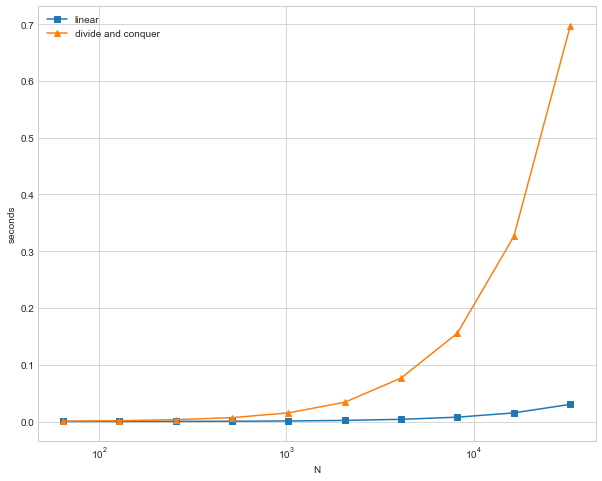

In [159]:
plt.plot(sizes, fast, marker='s', label='linear')
plt.plot(sizes, dq, marker='^', label='divide and conquer')
plt.legend()
plt.xscale('log')
plt.setp(plt.gca(), ylabel='seconds', xlabel='N')
plt.gcf().set_size_inches(10, 8)